In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import warnings
import pySingleCellNet as pySCN

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80)

C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [2]:
e155 = sc.read("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [3]:
e155.obs['timepoint']=="E15.5"

qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0    False
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0    False
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0    False
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0    False
                                        ...  
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1      False
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1      False
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1      False
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1      False
qb_E17-5_gdf:TTGGCAAAGTGGGCTAx-1-1      False
Name: timepoint, Length: 12096, dtype: bool

In [4]:
indicator = e155.obs["timepoint"]=="e15.5"
e155 = e155[indicator,:]

In [5]:
e155.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e155_raw.h5ad")

In [6]:
e155

View of AnnData object with n_obs × n_vars = 1003 × 31065
    obs: 'timepoint', 'ann1', 'level1', 'level2', 'level3', 'topLevel', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [7]:
e155.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E15-5_gdf:AAACCTGTCAACACTGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E15-5_gdf:AAACGGGCATGTAGTCx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E15-5_gdf:AAACGGGCATTCCTCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E15-5_gdf:AAACGGGTCCAAGCCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0
qb_E15-5_gdf:AAAGATGCAATGTAAGx-3-0-0,e15.5,joint,SC2,SC2_B,SC2_B1,GLE,0
...,...,...,...,...,...,...,...
qb_E15-5_gdf:TTATGCTTCACTCTTAx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1
qb_E15-5_gdf:TTCCCAGTCTCCGGTTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1
qb_E15-5_gdf:TTCGAAGAGCAGATCGx-3-0-1,e15.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E15-5_gdf:TTGTAGGTCACCGGGTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1


In [8]:
e155.obs_names

Index(['qb_E15-5_gdf:AAACCTGTCAACACTGx-3-0-0',
       'qb_E15-5_gdf:AAACGGGCATGTAGTCx-3-0-0',
       'qb_E15-5_gdf:AAACGGGCATTCCTCGx-3-0-0',
       'qb_E15-5_gdf:AAACGGGTCCAAGCCGx-3-0-0',
       'qb_E15-5_gdf:AAAGATGCAATGTAAGx-3-0-0',
       'qb_E15-5_gdf:AAAGATGGTTGTACACx-3-0-0',
       'qb_E15-5_gdf:AAAGATGTCTGGCGACx-3-0-0',
       'qb_E15-5_gdf:AAAGTAGAGAATTCCCx-3-0-0',
       'qb_E15-5_gdf:AAAGTAGAGGTGATATx-3-0-0',
       'qb_E15-5_gdf:AAAGTAGGTAGATTAGx-3-0-0',
       ...
       'qb_E15-5_gdf:TGAGGGATCGGTTCGGx-3-0-1',
       'qb_E15-5_gdf:TGCCAAAAGGAGTTTAx-3-0-1',
       'qb_E15-5_gdf:TGTATTCTCTTTAGTCx-3-0-1',
       'qb_E15-5_gdf:TTAGGACAGGGTCTCCx-3-0-1',
       'qb_E15-5_gdf:TTAGGACTCCTTTCGGx-3-0-1',
       'qb_E15-5_gdf:TTATGCTTCACTCTTAx-3-0-1',
       'qb_E15-5_gdf:TTCCCAGTCTCCGGTTx-3-0-1',
       'qb_E15-5_gdf:TTCGAAGAGCAGATCGx-3-0-1',
       'qb_E15-5_gdf:TTGTAGGTCACCGGGTx-3-0-1',
       'qb_E15-5_gdf:TTTGGTTAGATAGTCAx-3-0-1'],
      dtype='object', length=1003)

In [9]:
e155.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-
Rp1,ENSMUSG00000025900,1,4409241,3999557,-
Sox17,ENSMUSG00000025902,1,4497354,4490931,-
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-
...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+


# QC

In [10]:
#checks if the gene name (var) starts with 'mt' or 'ribo' via string methods
e155.var['mt']= e155.var_names.str.startswith(("mt-"))
print(sum(e155.var['mt']))

13


In [11]:
e155.var['ribo'] = e155.var_names.str.startswith(("Rps","Rpl"))
print(sum(e155.var['ribo']))

105


In [12]:
e155.var

,Accession,Chromosome,End,Start,Strand,mt,ribo
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,False,False
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-,False,False
Rp1,ENSMUSG00000025900,1,4409241,3999557,-,False,False
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-,False,False
...,...,...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+,False,False
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+,False,False
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+,False,False
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+,False,False


In [13]:
sc.pp.calculate_qc_metrics(e155, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

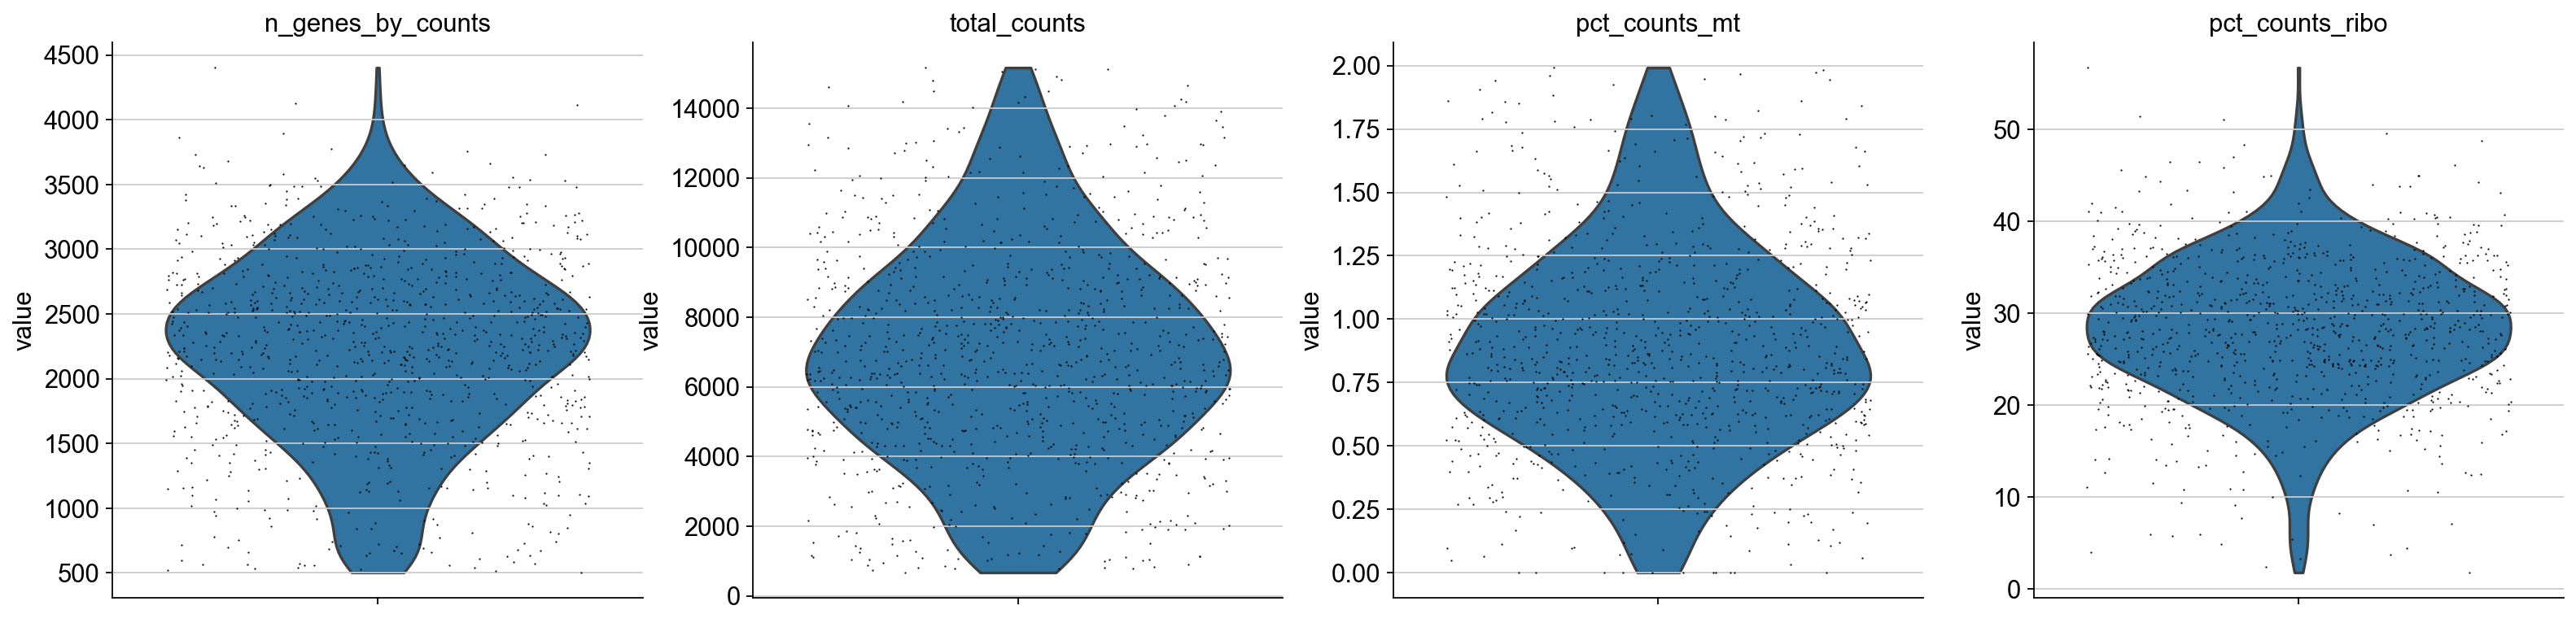

In [14]:
axs = sc.pl.violin(e155, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

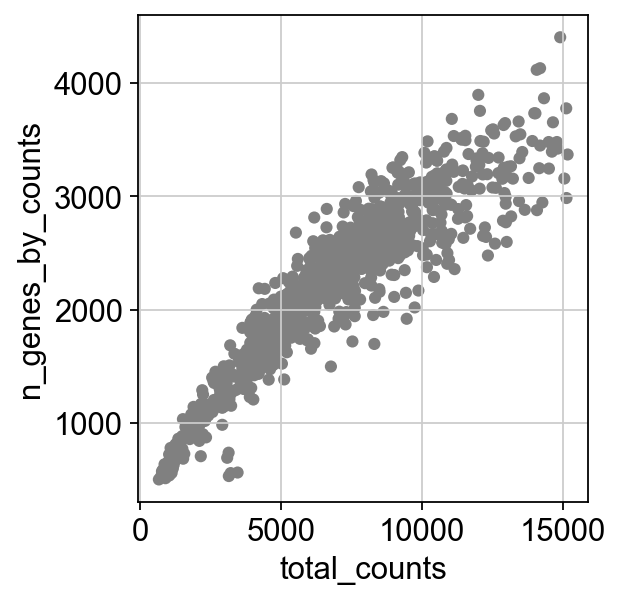

In [15]:
sc.pl.scatter(e155, x='total_counts', y='n_genes_by_counts')

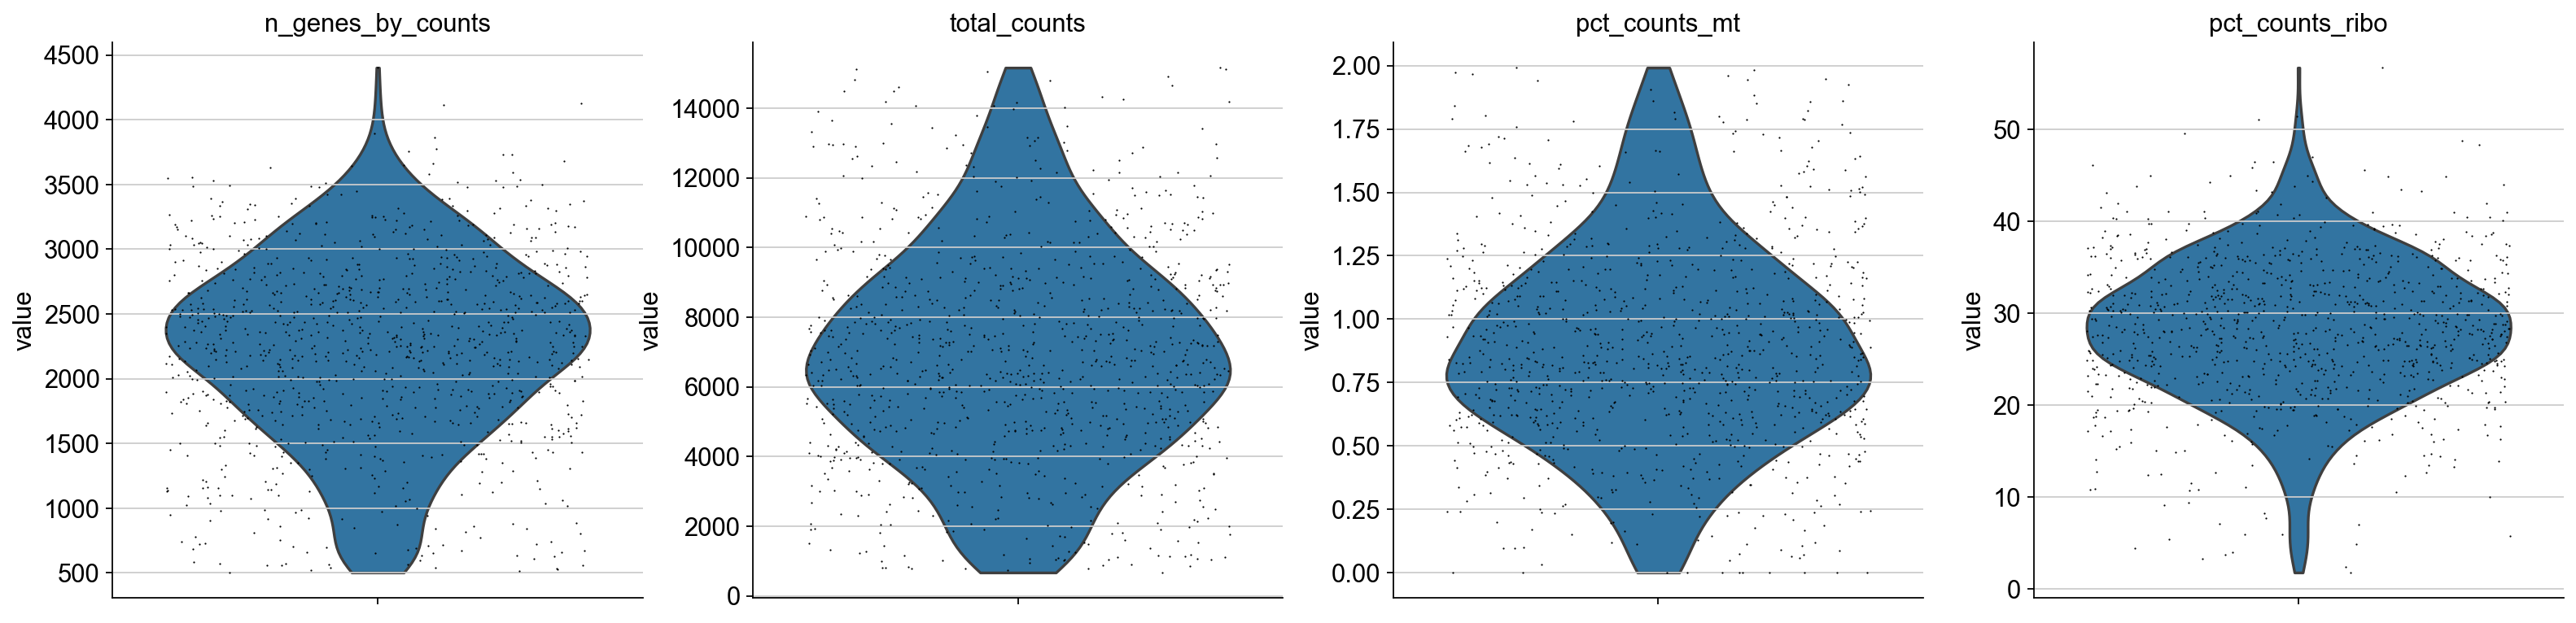

In [16]:
e155 = e155[e155.obs['total_counts'] < 18000, :]
e155 = e155[e155.obs['pct_counts_mt'] < 2.5, :]
# filter for percent ribo > 0.05
e155 = e155[e155.obs['pct_counts_ribo'] < 60, :]
axs = sc.pl.violin(e155, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

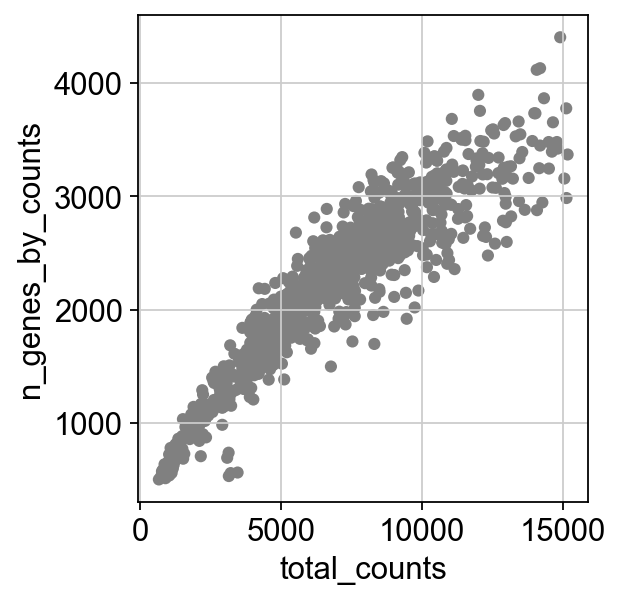

In [17]:
sc.pl.scatter(e155, x='total_counts', y='n_genes_by_counts')

In [18]:
sc.pp.calculate_qc_metrics(e155, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

In [19]:
e155 = e155[e155.obs['n_genes_by_counts'] > 500, :]

# Remove genes we don't care about (ribo, malat, mito) and are expressed in less than 5 cells

In [20]:
sc.pp.filter_genes(e155, min_cells=5)


print("Number of cells: ",e155.n_obs)

#save a copy of anndata before normalization 
e155 = e155.copy()

##remove MT, ribo, and maltat reads since these reads are highly abundant, but not relevant to expirement
mito_genes = e155.var_names.str.startswith("mt-")
ribo_genes = e155.var_names.str.startswith(("Rps","Rpl"))
malat_gene = e155.var_names.str.startswith("Malat1")

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, malat_gene)
keep = np.invert(remove)

print(len(remove))

print(np.count_nonzero(keep))
print(len(keep) - np.count_nonzero(keep))

e155 = e155[:,keep].copy()

print("Number of genes: ",e155.n_vars)

Number of cells:  1003
13049
12941
108
Number of genes:  12941


# SCN using Qin's data to train

Load in Qin's data

In [21]:
adTrain = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [22]:
adTrain.var_names_make_unique()

In [23]:
qDat = e155.copy()
qDat.var_names_make_unique()

In [24]:
genesTrain = adTrain.var_names
genesQuery = qDat.var_names
cgenes = genesTrain.intersection(genesQuery)
print(len(cgenes))

adTrain1 = adTrain[:,cgenes]
adQuery = qDat[:,cgenes].copy()
adTrain1 = adTrain1[~adTrain1.obs.index.duplicated()]

12941


In [25]:
qDat.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
qb_E15-5_gdf:AAACCTGTCAACACTGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,1648,4089.0,1116.0,27.292738,20.0,0.489117
qb_E15-5_gdf:AAACGGGCATGTAGTCx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3172,10346.0,2574.0,24.879179,85.0,0.821574
qb_E15-5_gdf:AAACGGGCATTCCTCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3198,9217.0,1614.0,17.511120,96.0,1.041554
qb_E15-5_gdf:AAACGGGTCCAAGCCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3500,11401.0,2413.0,21.164810,108.0,0.947285
qb_E15-5_gdf:AAAGATGCAATGTAAGx-3-0-0,e15.5,joint,SC2,SC2_B,SC2_B1,GLE,0,1279,3278.0,1017.0,31.025017,26.0,0.793167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E15-5_gdf:TTATGCTTCACTCTTAx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,3078,12495.0,4134.0,33.085232,90.0,0.720288
qb_E15-5_gdf:TTCCCAGTCTCCGGTTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,3299,12002.0,3282.0,27.345444,81.0,0.674888
qb_E15-5_gdf:TTCGAAGAGCAGATCGx-3-0-1,e15.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2665,10317.0,4100.0,39.740234,95.0,0.920810
qb_E15-5_gdf:TTGTAGGTCACCGGGTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,2347,7399.0,1913.0,25.854843,61.0,0.824436


In [26]:
qDat.var

,Accession,Chromosome,End,Start,Strand,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,False,False,88,0.094716,91.226321,95.0,88
Rgs20,ENSMUSG00000002459,1,5070285,4909576,-,False,False,10,0.011964,99.002991,12.0,10
4732440D04Rik,ENSMUSG00000090031,1,6215293,6209866,-,False,False,6,0.005982,99.401795,6.0,6
Mybl1,ENSMUSG00000025912,1,9700209,9667415,-,False,False,30,0.034895,97.008973,35.0,30
Vcpip1,ENSMUSG00000045210,1,9748382,9718622,-,False,False,184,0.214357,81.655035,215.0,184
...,...,...,...,...,...,...,...,...,...,...,...,...
Ddx3y,ENSMUSG00000069045,Y,1286629,1260771,-,False,False,501,0.796610,50.049850,799.0,501
Kdm5d,ENSMUSG00000056673,Y,956786,897788,+,False,False,25,0.025922,97.507478,26.0,25
Eif2s3y,ENSMUSG00000069049,Y,1028847,1010543,+,False,False,271,0.342971,72.981057,344.0,271
Gm29650,ENSMUSG00000099876,Y,1049134,1048393,+,False,False,11,0.010967,98.903290,11.0,11


# Split training data into two to check classifer later

In [27]:
expTrain, expVal = pySCN.splitCommonAnnData(adTrain1, ncells=200,dLevel="level2")

ncc : 
78
7 : 
48
3 : 
251
9 (divi) : 
141
endothelial : 
23
8 (prog) : 
123
4 : 
209
6 (stro) : 
134
6 : 
52
SC1_B : 
895
7 (prog) : 
51
0 : 
22
SC1_A : 
1791
8 : 
25
SC3_A : 
2451
SC2_A : 
627
4 (synfib) : 
26
2 : 
354
blood : 
286
erythro : 
6
SC3_B : 
1070
1 (chon) : 
90
dermis : 
964
SC2_B : 
495
5 : 
5
melanocyte : 
15
3 (line) : 
49
2 (liga) : 
54
myocyte : 
1128
5 (stro) : 
633


# Train the classifer

In [28]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 100, nTrees = 1000, nTopGenePairs = 100, dLevel = "level2", stratify=True, limitToHVG=True)

HVG
Matrix normalized
There are  1582  classification genes

0
1 (chon)
2
2 (liga)
3
3 (line)
4
4 (synfib)
5
5 (stro)
6
6 (stro)
7
7 (prog)
8
8 (prog)
9 (divi)
SC1_A
SC1_B
SC2_A
SC2_B
SC3_A
SC3_B
blood
dermis
endothelial
erythro
melanocyte
myocyte
ncc
There are 2871 top gene pairs

Finished pair transforming the data



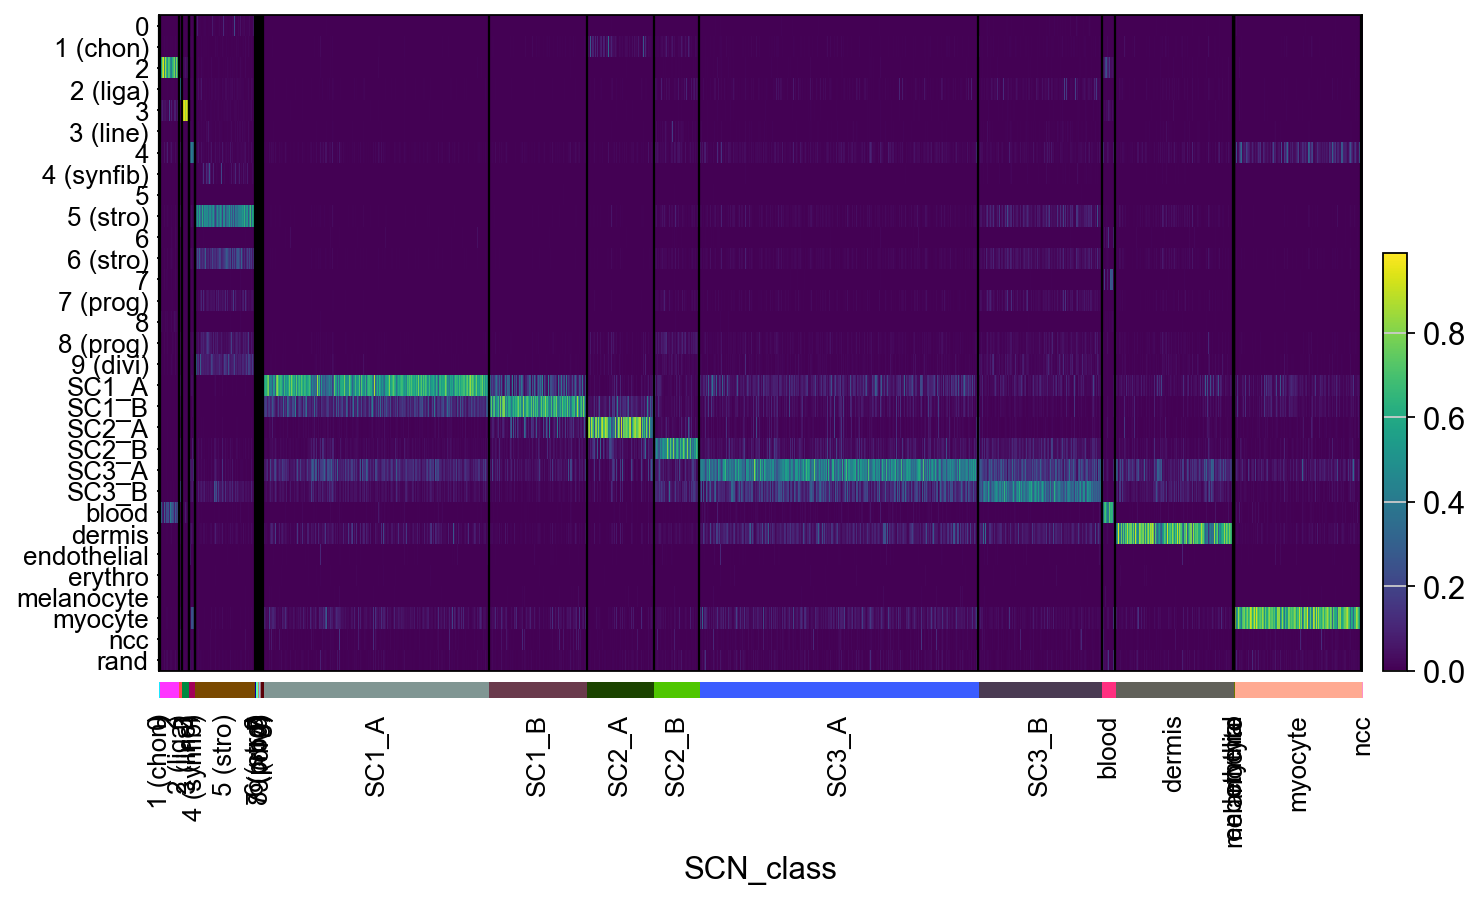

In [29]:
adVal = pySCN.scn_classify(expVal, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adVal, adVal.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

In [30]:
adQd5 = pySCN.scn_classify(adQuery, cgenesA, xpairs, tspRF, nrand = 0)

In [31]:
adQuery.obs = pd.concat([adQuery.obs, adQd5.obs['SCN_class']], axis=1)

# count normalization

In [32]:
e155 = adQuery.copy()

In [33]:
e155.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e155_SCN.h5ad")

In [34]:
adata = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e155_SCN.h5ad")

In [35]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

In [37]:
sc.pp.scale(adata, max_value=10)

# PCA

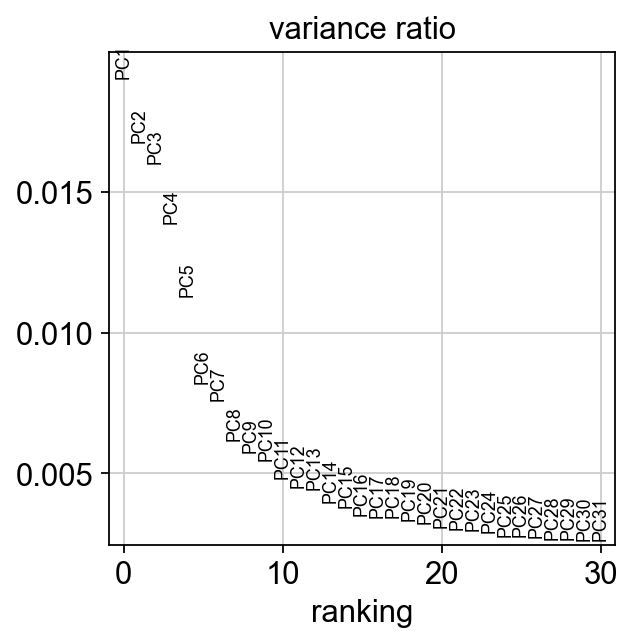

In [38]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pl.pca_variance_ratio(adata)

# fine neighbors

In [39]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution =.3)
sc.tl.umap(adata, .25)

In [40]:
adata.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,SCN_class,leiden
qb_E15-5_gdf:AAACCTGTCAACACTGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,1648,4089.0,1116.0,27.292738,20.0,0.489117,SC3_B,1
qb_E15-5_gdf:AAACGGGCATGTAGTCx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3172,10346.0,2574.0,24.879179,85.0,0.821574,SC3_B,1
qb_E15-5_gdf:AAACGGGCATTCCTCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3198,9217.0,1614.0,17.511120,96.0,1.041554,SC3_B,1
qb_E15-5_gdf:AAACGGGTCCAAGCCGx-3-0-0,e15.5,joint,SC3,SC3_B,SC3_B1,GLE,0,3500,11401.0,2413.0,21.164810,108.0,0.947285,SC3_B,1
qb_E15-5_gdf:AAAGATGCAATGTAAGx-3-0-0,e15.5,joint,SC2,SC2_B,SC2_B1,GLE,0,1279,3278.0,1017.0,31.025017,26.0,0.793167,SC2_B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E15-5_gdf:TTATGCTTCACTCTTAx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,3078,12495.0,4134.0,33.085232,90.0,0.720288,dermis,5
qb_E15-5_gdf:TTCCCAGTCTCCGGTTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,3299,12002.0,3282.0,27.345444,81.0,0.674888,dermis,5
qb_E15-5_gdf:TTCGAAGAGCAGATCGx-3-0-1,e15.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2665,10317.0,4100.0,39.740234,95.0,0.920810,myocyte,4
qb_E15-5_gdf:TTGTAGGTCACCGGGTx-3-0-1,e15.5,dermis,dermis,dermis,dermis,non-GLE,1,2347,7399.0,1913.0,25.854843,61.0,0.824436,dermis,5


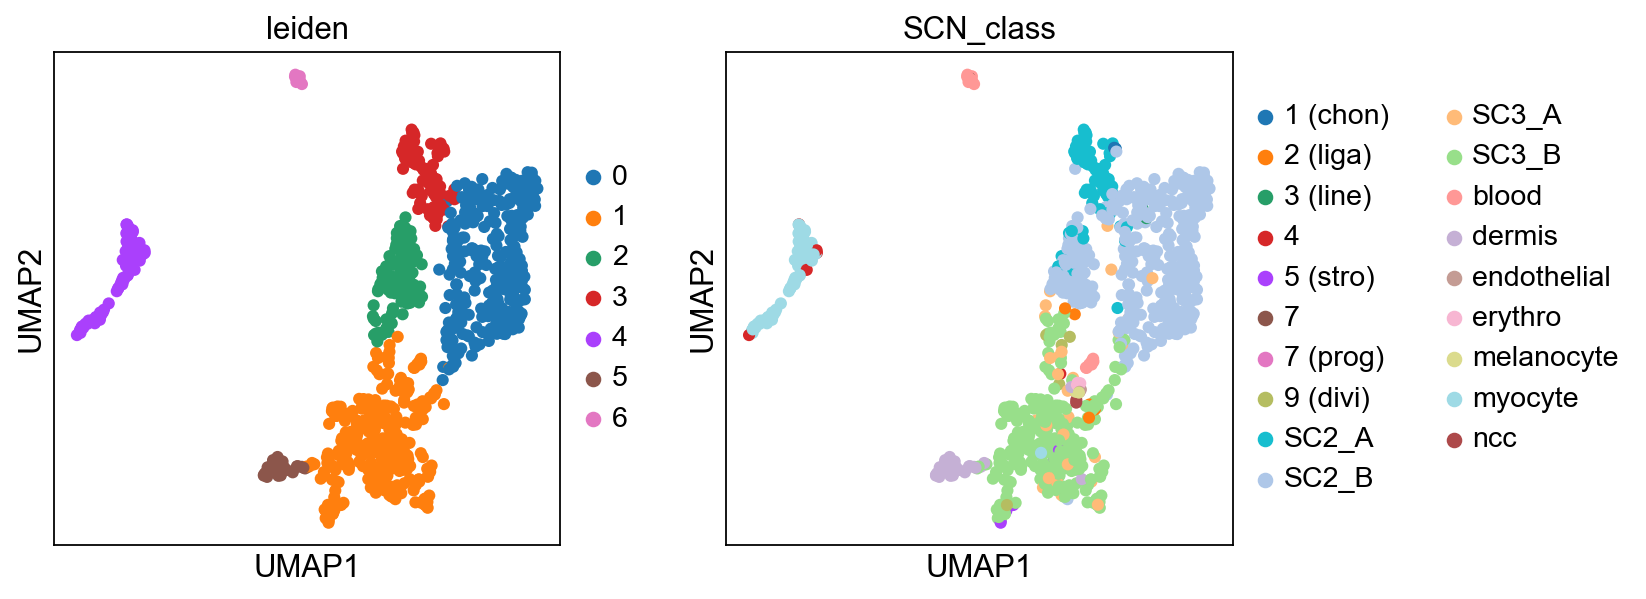

In [41]:
sc.pl.umap(adata, color=['leiden', 'SCN_class'], palette=sc.pl.palettes.default_20, )

In [42]:
adata.var_names

Index(['Mrpl15', 'Rgs20', '4732440D04Rik', 'Mybl1', 'Vcpip1', 'Snhg6', 'Tcf24',
       'Cops5', 'Arfgef1', 'Cpa6',
       ...
       'Gpm6b', 'Trappc2', 'Arhgap6', 'Gm21887', 'Uty', 'Ddx3y', 'Kdm5d',
       'Eif2s3y', 'Gm29650', 'Gm47283'],
      dtype='object', length=12941)

In [43]:
adata.obs["level3"].value_counts()


SC3_B1         254
SC2_B1         201
SC2_B2          91
myocyte         88
SC2_B3          81
SC2_A2          66
SC2_B4          51
dermis          41
SC3_A2          27
blood           25
SC3_B2          23
SC3_A1          13
SC3_B3           8
SC3_B4           7
SC2_A5           6
SC2_B5           4
erythro          3
SC3_A4           3
SC2_A3           3
endothelial      2
melanocyte       2
ncc              2
SC3_A3           1
SC2_A6           1
Name: level3, dtype: int64

In [44]:
adata = adata[~(adata.obs["level3"] == "SC3_A3")]
adata = adata[~(adata.obs["level3"] == "SC2_A6")]
adata.obs["level3"].value_counts()

SC3_B1         254
SC2_B1         201
SC2_B2          91
myocyte         88
SC2_B3          81
SC2_A2          66
SC2_B4          51
dermis          41
SC3_A2          27
blood           25
SC3_B2          23
SC3_A1          13
SC3_B3           8
SC3_B4           7
SC2_A5           6
SC2_B5           4
SC3_A4           3
SC2_A3           3
erythro          3
endothelial      2
melanocyte       2
ncc              2
Name: level3, dtype: int64

In [45]:
# 클러스터링 결과로 rank_genes_groups를 실행
sc.tl.rank_genes_groups(adata, 'level3', use_raw=False)

# 상위 순위 유전자 목록 추출
top_genes_per_cluster = adata.uns['rank_genes_groups']['names']

# 데이터프레임 생성
gene_df = pd.DataFrame(top_genes_per_cluster)

# 상위 50개 유전자만 선택
gene_df = gene_df.iloc[:, :100]

# 데이터프레임을 엑셀 파일로 저장
gene_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e155_SCN_cluster_rank_genes_level3.xlsx', index=False)